# Hopfield Network Demo

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from alnum_dataset import generate_alnum_dataset
from hopfield import *

In [21]:
LEARNING_METHOD = 'hebbian'  # Options: 'hebbian', 'centered', 'damped'
LAM = 0.1                  # Damping factor for damped pseudoinverse training 

In [22]:
# Load dataset
X, y = generate_alnum_dataset()

print(f"Dataset shape: {X.shape}")
print(f"Data unique values: {np.unique(X)}")
print(f"Labels: {y}")

Dataset shape: (36, 28, 28)
Data unique values: [-1  1]
Labels: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


## Select patterns to store

In [23]:
# Prepare data for Hopfield Network
Patterns = X.reshape(len(X), -1)            # Reshape to (num_patterns, num_features)
num_samples, num_features = Patterns.shape  # get number of samples and features

print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

Number of samples: 36
Number of features: 784


## Train Hopfield network

First, we show just one 

In [24]:
# Initialize Hopfield Network
hopfield_net = HopfieldNetwork(
    n_neurons=num_features, 
    learning_method=LEARNING_METHOD, damped_lam=LAM
)

# Train Hopfield Network
hopfield_net.memorize(Patterns[0:1], labels=y[0:1]) 

# Check stability of stored patterns
stability = hopfield_net.check_stability()
for label, margin in stability.items():
    status = "Stable" if margin >= 0 else "Unstable"
    print(f"Pattern {label}: {status} (margin = {margin:.6f})")

Pattern A: Stable (margin = 0.998724)


## Weights of the Hopfield networks

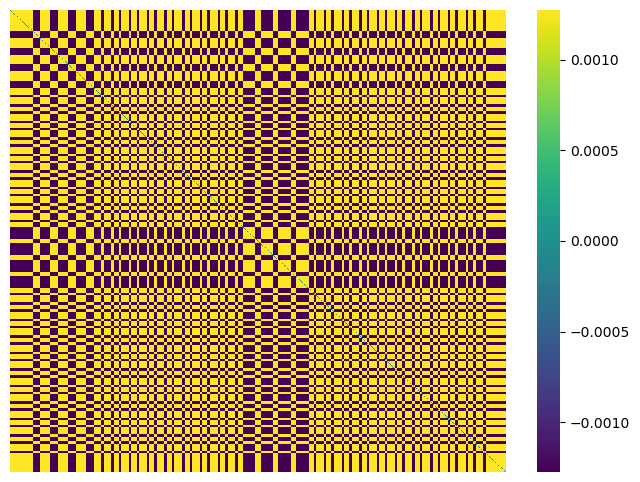

In [25]:
# Weights of the trained Hopfield Network
W = hopfield_net.weights()

# Plot the weight matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(W, cmap='viridis')

ax.set_xticks([])
ax.set_yticks([])
plt.show()

## Test Hopfield Network

In [26]:
print(f"Number of stored patterns: {hopfield_net.num_memories()}")

Number of stored patterns: 1


### Stored patterns

Converged after 1 iterations.


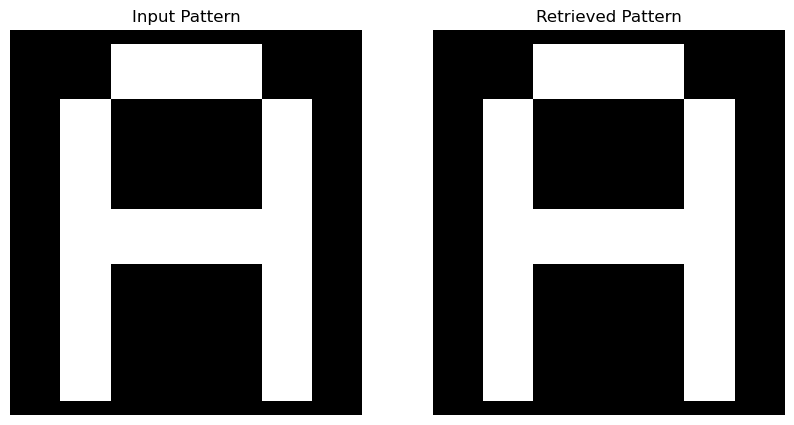

In [27]:
inp = hopfield_net.memories[0].copy()
out = hopfield_net.retrieve(inp, max_iterations=1000)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(inp.reshape(28,28), cmap='gray', cbar=False, ax=axs[0]) 
sns.heatmap(out.reshape(28,28), cmap='gray', cbar=False, ax=axs[1])
axs[0].set_title("Input Pattern")
axs[1].set_title("Retrieved Pattern")

for i in range(2):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()

### Noisy patterns

In [28]:
def add_noise(pattern, p=0.1):
    """
    Add noise to a binary pattern by flipping each bit with probability p.
    """
    noisy_pattern = pattern.copy()
    n_flip = int(p * pattern.size)
    flip_indices = np.random.choice(pattern.size, size=n_flip, replace=False)
    noisy_pattern[flip_indices] *= -1
    return noisy_pattern

Converged after 2 iterations.


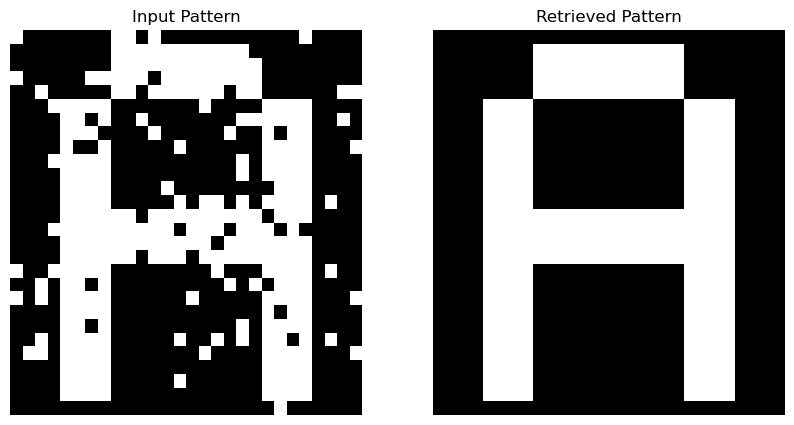

In [29]:
inp = add_noise(hopfield_net.memories[0], p=0.1)
out, history = hopfield_net.retrieve(inp, history=True)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(inp.reshape(28,28), cmap='gray', cbar=False, ax=axs[0]) 
sns.heatmap(out.reshape(28,28), cmap='gray', cbar=False, ax=axs[1])
axs[0].set_title("Input Pattern")
axs[1].set_title("Retrieved Pattern")

for i in range(2):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()

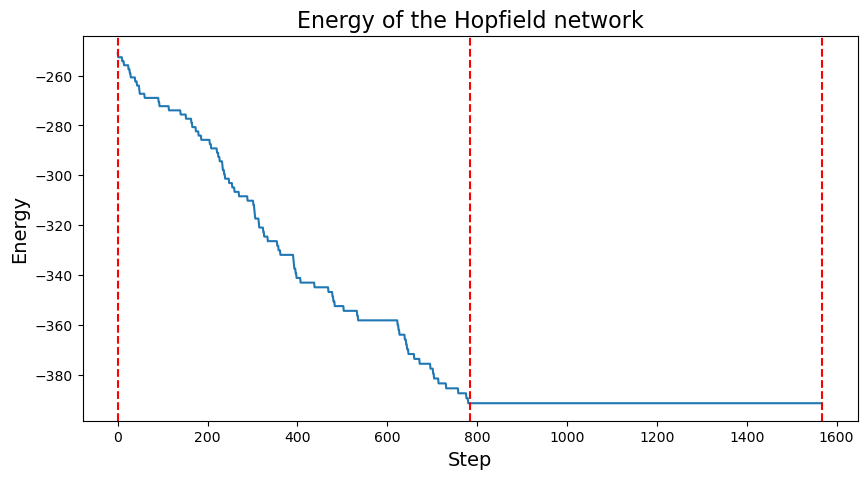

In [30]:
# Energy (skip initial state)
energy = np.array(history['energy'][num_features:])
step = np.arange(len(energy))
iter = [num_features * i for i in range(len(energy) // num_features + 1)]

# Plot energy over steps
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(x=step, y=energy, ax=ax)

# Mark iteration boundaries
ax.vlines(iter, 0, 1, transform=ax.get_xaxis_transform(), linestyle="--", color="r")

ax.set_title("Energy of the Hopfield network", size=16)
ax.set_xlabel("Step", size=14)
ax.set_ylabel("Energy", size=14)

plt.show()

### Incomplete patterns

In [31]:
def hide_pattern(pattern):
    """
    Hide a fraction of the pattern by setting those bits to zero.
    """
    hidden_pattern = pattern.copy().reshape(28,28)
    hidden_pattern[:,0:14] = -1  # Hide top half of the pattern
    return hidden_pattern.reshape(-1)

Converged after 2 iterations.


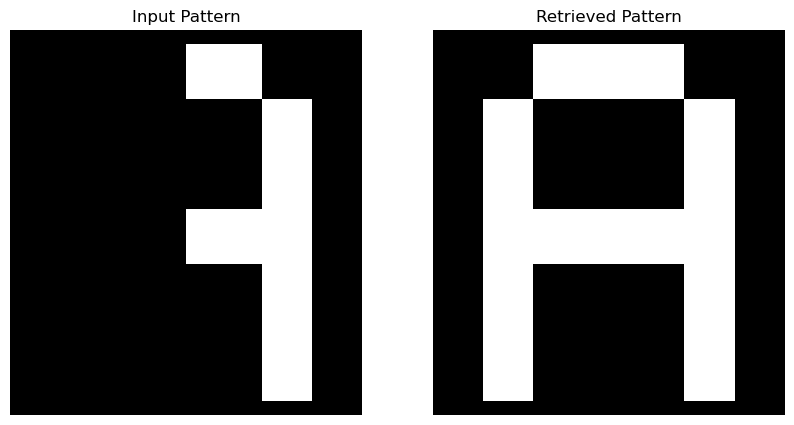

In [32]:
inp = hide_pattern(hopfield_net.memories[0])
out = hopfield_net.retrieve(inp)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(inp.reshape(28,28), cmap='gray', cbar=False, ax=axs[0]) 
sns.heatmap(out.reshape(28,28), cmap='gray', cbar=False, ax=axs[1])
axs[0].set_title("Input Pattern")
axs[1].set_title("Retrieved Pattern")

for i in range(2):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()

***

Now, we test how the result is influence by when more patterns are stored in the memory.

In [33]:
hopfield_net.memorize(Patterns[1:2], labels=y[1:2])

# Check stability of stored patterns
stability = hopfield_net.check_stability()
for label, margin in stability.items():
    status = "Stable" if margin >= 0 else "Unstable"
    print(f"Pattern {label}: {status} (margin = {margin:.6f})")

Pattern A: Stable (margin = 0.446429)
Pattern B: Stable (margin = 0.446429)


In [34]:
hopfield_net.memorize(Patterns[2:3], labels=y[2:3])

# Check stability of stored patterns
stability = hopfield_net.check_stability()
for label, margin in stability.items():
    status = "Stable" if margin >= 0 else "Unstable"
    print(f"Pattern {label}: {status} (margin = {margin:.6f})")

Pattern A: Stable (margin = 0.128827)
Pattern B: Unstable (margin = -0.034439)
Pattern C: Stable (margin = 0.200255)


Converged after 2 iterations.


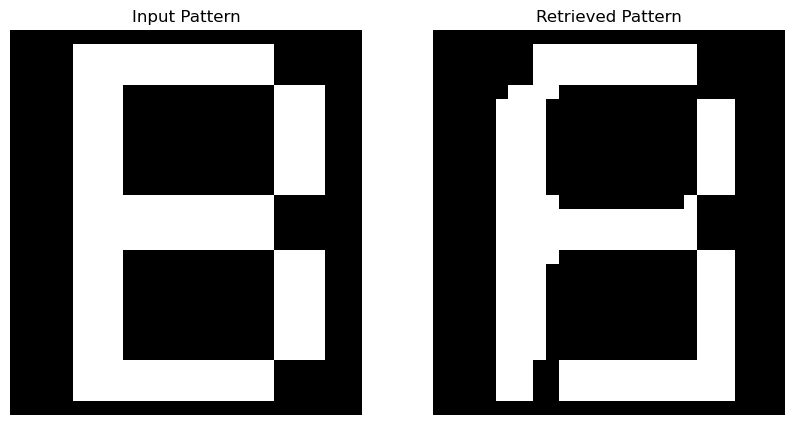

In [35]:
inp = hopfield_net.memories[1].copy()
out, history = hopfield_net.retrieve(inp, max_iterations=1000, history=True)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(inp.reshape(28,28), cmap='gray', cbar=False, ax=axs[0]) 
sns.heatmap(out.reshape(28,28), cmap='gray', cbar=False, ax=axs[1])
axs[0].set_title("Input Pattern")
axs[1].set_title("Retrieved Pattern")

for i in range(2):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()

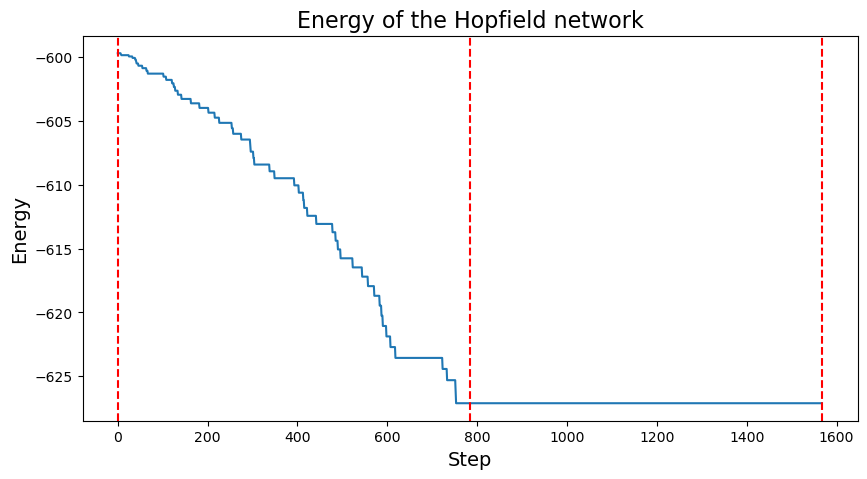

In [36]:
# Energy (skip initial state)
energy = np.array(history['energy'][num_features:])
step = np.arange(len(energy))
iter = [num_features * i for i in range(len(energy) // num_features + 1)]

# Plot energy over steps
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(x=step, y=energy, ax=ax)

# Mark iteration boundaries
ax.vlines(iter, 0, 1, transform=ax.get_xaxis_transform(), linestyle="--", color="r")

ax.set_title("Energy of the Hopfield network", size=16)
ax.set_xlabel("Step", size=14)
ax.set_ylabel("Energy", size=14)

plt.show()